# Breast cancer diagnosis using Decision Tree Classifier

###Import all the required libraries

In [0]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### importing dataset

In [0]:
data = pd.read_csv('BreastCancerData.csv')

In [34]:
# ( Row, Column )

data.shape

(569, 32)

In [35]:
# Columns names

data.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity worst', 'concave points _worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [36]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity worst,concave points _worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,0.11890,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,M
1,842517,0.08902,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,M
2,84300903,0.08758,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,M
3,84348301,0.17300,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,M
4,84358402,0.07678,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,M


In [37]:
# unique values of the column which is to be predicted by the classifier

data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [38]:
# Quick glimpse of tumor features (mean values) With respect to the diagnosis

data.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity worst,concave points _worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,0.079442,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246
M,3.681805e+07,0.091530,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468


In [39]:
# For visual comparisons of different diagnosis
# count number of : - benign, and malignant tumor in data

 # For Benign
count_bengin = (data['diagnosis']=='B').sum()
print("Bengin : ",count_bengin)

# For Malignant
count_malignant = (data['diagnosis']=='M').sum()
print("Malignant : ",count_malignant)


Bengin :  357
Malignant :  212


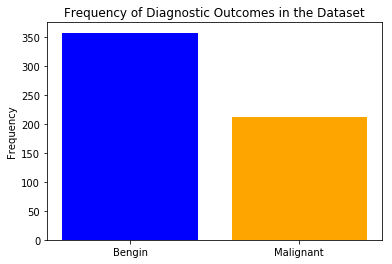

In [40]:
# Visualization of frequency of Diagnostic Outcomes in the  Dataset

plt.bar(['Bengin','Malignant'],[count_bengin,count_malignant],color=('blue','orange'))
plt.title('Frequency of Diagnostic Outcomes in the Dataset')
plt.ylabel('Frequency')
plt.show()

In [44]:
#taking care of missing data

(data.isna()).sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity worst            0
concave points _worst      0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

This shows that our data have no NULL values

In [45]:
# convert the dataset into numpy's ndarray (X and y)

y = data['diagnosis'].values
data.drop(['diagnosis', 'id'], inplace=True, axis=1)
X = data.values
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Converting categorical data to numerical value

In [50]:
# taking care of categorical data

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

print(y[100:110])

[1 0 0 0 0 1 0 0 1 0]


We will use 75% of the data for training and 25% for testing

In [0]:
# spitting data into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Now we will normalize/standardize our features before applying machine learning techniques.

We will use standeredscalar to normalize our data.

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.

In [0]:
# feature scaling

from sklearn.preprocessing import StandardScaler
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

Accuracy_calculate function takes training data input , training data output and depth of Decision Tree Classifier
and returns the accuracy of our classification for the given depth value.

In [0]:
def Accuracy_calculate(X_train,y_train,depth):
    # applying DecisionTreeClassifier model
    
    classifier = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    classifier.fit(X_train, y_train)
    
    #predicting values for test set
    
    y_pred = classifier.predict(X_test)
    
    #checking the accuracy
    Accuracy = accuracy_score(y_test,y_pred)
    Accuracy = Accuracy*100
    
    return Accuracy,depth

Just to check if our code is working or not, first we will check accuracy for any random value of max_depth

In [54]:
#for max_depth 3

Accuracy,depth = Accuracy_calculate(X_train,y_train,3)
print("Accuracy for max_depth 3 is : ",Accuracy)

Accuracy for max_depth 3 is :  95.1048951048951


For max_depth = 3 , our accuracy is above 95%

Now we will check accuracy for max_depth value between1 to 150 and calculate which value of max_depth gives highest accuracy

In [0]:
#value of max_depth for better performance

Accuracy = 0

Accuracy_list = []
Depth_list = []
max_Accuracy = []
max_Depth = []

for i in range(1,151):
    x,y = Accuracy_calculate(X_train,y_train,i)
    Accuracy_list.append(x)
    Depth_list.append(y)
    if x > Accuracy:
        Accuracy = x
        depth = y

In [67]:
for i in range(1,150):
    if Accuracy_list[i] == Accuracy:
        max_Accuracy.append(Accuracy_list[i])
        max_Depth.append(Depth_list[i])
print("best value of max_depth is : ",depth," : with accuracy : ",Accuracy)

best value of max_depth is :  4  : with accuracy :  96.5034965034965


So, we got our best accuracy at max_depth 4

Now we will plot accuracy value for different max_depth value

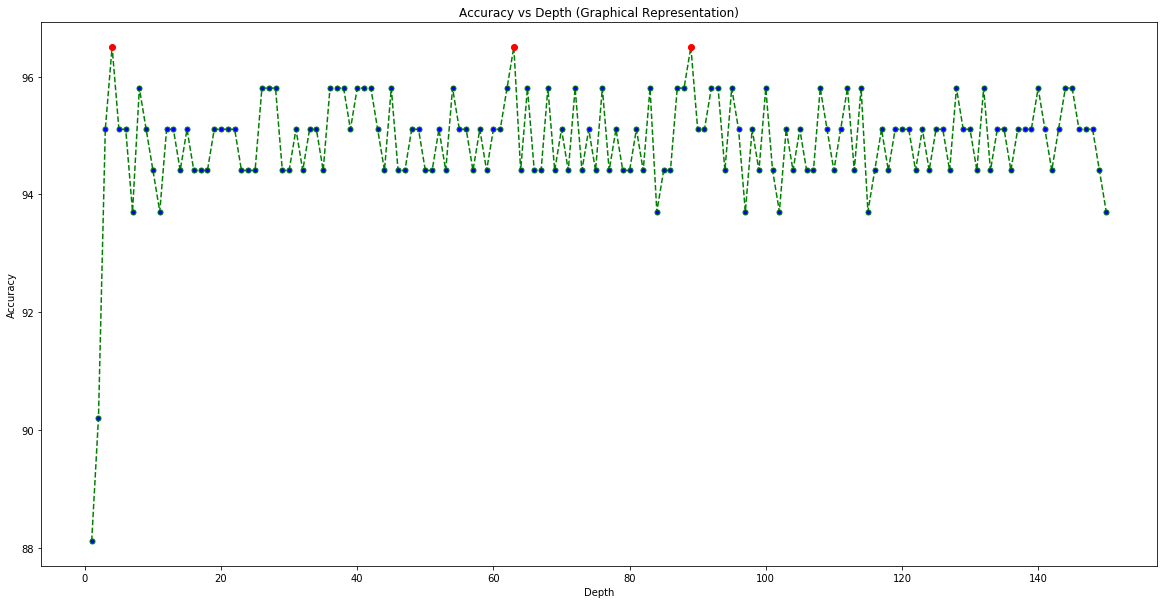

In [68]:
plt.figure(figsize=(20,10))
plt.plot(Depth_list,Accuracy_list,color='green',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=5)
plt.plot(max_Depth,max_Accuracy,'ro')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.title('Accuracy vs Depth (Graphical Representation)')
plt.show()

We can see that their are more than 1 value of max_depth which gives highest accuracy

In [69]:
print(max_Depth)

[4, 63, 89]


For max_depth value 4, 63 and 89 we got our maximin accuracy